# Final - Introduction to Python and Machine Learning project

# CAT vs DOG Classification from Image – Machine Learning

# I will follow the following steps to execute the Machine Learning Cycle

#### Step 1: Import Libraries

#### Step 2: Load Sample Data

    Step 2.1: Load Training data
    
        Step 2.1.1: Load Training Data
        
    Step 2.2: Load Testing Data
    
        Step 2.2.1: Load Testing Data
    
    Step 2.2: Pre-process Data

#### Step 3: Understand and Pre-process Sample Data
    
    Step 3.1: Understand Training Data
    
    Step 3.2: Understand Testing Data
    
    Step 3.3: Pre-process Training Data
    
    Step 3.3: Pre-process Testing Data

#### Step 4: Convert Output to Machine Understandable Format (Numerical Representation) using Label Encoding Approach
    
    Step 4.1: Train the Label Encoder
    
    Step 4.2: Convert Output of Training Data to Machine Understandable Format (Numerical Representation) using Label 
    
    Encoder(Trained in Step 4.1)
    
    Step 4.3: Convert Output of Testing Data to Machine Understandable Format (Numerical Representation) using Label Encoder
    
    (Trained in Step 4.1)

#### Step 5: Feature Extraction using Pixel Values based Approach (Converting Input to Machine Understandable Format (Numerical Representation))

    Step 5.1: Extract Pixel Values based Features from Input (Image) of Training Data

    Step 5.2: Extract Pixel Values based Features from Input (Image) of Testing Data
    
    Step 5.3: Saving Features in Excel / CSV Files
        
        Step 5.3.1 Saving Training Features in Excel File
        
        Step 5.3.2 Saving Testing Features in Excel File

#### Step 6: Execute the Training Phase

    Step 6.1: Load Training Data in Machine Understandable Format (Numerical Representation) (Saved in Step 5.3.1)

    Step 6.2: Splitting Training Data into Input Feature Vectors and Outputs / Labels

    Step 6.3: Train the Model

    Step 6.4: Save the Trained Model

#### Step 7: Execute the Testing Phase 

    Step 7.1: Load Testing Data in Machine Understander Format (Numerical Representation) (Saved in Step 5.3.2)
    
    Step:7.2 Load the Model (Saved in Step 6.4)
    
    Step 7.3: Evaluate the Model

        Step 7.3.1: Splitting Testing Data into Input Feature Vectors and Outputs / Labels
        
        Step 7.3.2: Evaluate the Model (Make Predictions on Test Data)
        
        Step 7.3.3: Evaluate the Model (Calculate Model Accuracy)

#### Step 8: Execute the Application Phase 

    Step 8.1: Take Input from User 

    Step 8.2: Convert User Input into Feature Vector using Pixel Values based Approach (Exactly Same as Feature Vectors of 
    
    Training Data and Testing Data)

    Step 8.3: Make Prediction on Unseen Data
        
        Step 8.3.1: Load the Model (Saved in Step 6.4)
        
        Step 8.3.2: Apply Model on Feature Vector of Unseen Data
        
        Step 8.3.3: Return Prediction to the User

# Step 1: Import Libraries

In [1]:
# Import Libraries

import cv2
import os
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
import tkinter as tk
from tkinter import filedialog
from IPython.display import Image
from matplotlib import pyplot as plt
from prettytable import PrettyTable   
from astropy.table import Table, Column
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Conv2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
import warnings; warnings.simplefilter('ignore')
pd.options.mode.chained_assignment = None

# Step 2: Load Sample Data

## Step 2.1: Load Training Data

In [2]:
for path,empty,images_name in os.walk(r'dataset/train'):
    pass

training_data=[]

for image_name in tqdm(images_name):
    image = cv2.imread(path+"/" +image_name)
    training_data.append(image)

100%|██████████| 4000/4000 [00:09<00:00, 427.16it/s]


In [3]:
training_dataset = []
index=0
for i in images_name:
    if("cat" in i):
        training_dataset.append([training_data[index],"cat"])
    else:
        training_dataset.append([training_data[index],"dog"])
    index=index+1
training_dataset=pd.DataFrame(training_dataset,columns=["Pixel Values","Label"])

## Step 2.2: Load Testing Data

In [4]:
for path,empty,images_name in os.walk(r'dataset/test'):
    pass
testing_data=[]
image_count=0
for image_name in tqdm(images_name):
    image = cv2.imread(path+"/" +image_name);
    testing_data.append(image)

100%|██████████| 1000/1000 [00:02<00:00, 376.15it/s]


In [5]:
testing_dataset = []
index=0
for i in images_name:
    if("cat" in i):
        testing_dataset.append([testing_data[index],"cat"])
    else:
        testing_dataset.append([testing_data[index],"dog"])
    index=index+1
testing_dataset=pd.DataFrame(testing_dataset,columns=["Pixel Values","Label"])

# Step 3: Understand and Pre-process Sample Data

## Step 3.1: Understand Training Data

In [6]:
# Understand Sample Data

print("\n\nAttributes in Training Data:")

print(training_dataset.columns)

print("\n\nNumber of Instances in Training Data:",training_dataset["Label"].count())



Attributes in Training Data:

Index(['Pixel Values', 'Label'], dtype='object')


Number of Instances in Training Data: 4000



## Step 3.2: Understand Testing Data

In [7]:
# Understand Sample Data

print("\n\nAttributes in Testing Data:")

print(testing_dataset.columns)

print("\n\nNumber of Instances in Testing Data:",testing_dataset["Label"].count())



Attributes in Testing Data:

Index(['Pixel Values', 'Label'], dtype='object')


Number of Instances in Testing Data: 1000



## Step 3.3: Pre-process Training Data

In [8]:
for pixels in enumerate(training_dataset["Pixel Values"]):
    training_dataset["Pixel Values"][pixels[0]]=cv2.resize(pixels[1],(45,45),interpolation=cv2.INTER_AREA)
print("\n\nPre-processed Training Data:")



Pre-processed Training Data:



## Step 3.4: Pre-process Testing Data

In [9]:
for pixels in enumerate(testing_dataset["Pixel Values"]):
    testing_dataset["Pixel Values"][pixels[0]]=cv2.resize(pixels[1],(45,45),interpolation=cv2.INTER_AREA)
print("\n\nPre-processed Testing Data:")



Pre-processed Testing Data:



# Step 4: Convert Output to Machine Understandable Format (Numerical Representation) using Label Encoding Approach

## Step 4.1: Train the Label Encoder

In [10]:
# Train the Label Encoder
# Label
label = pd.DataFrame({"Label":["cat","dog"]})
label_encoder = LabelEncoder()

# Train the Label Encoders
label_encoder.fit(np.ravel(label))

LabelEncoder()

## Step 4.2: Convert Output of Training Data to Machine Understandable Format (Numerical Representation) using Label Encoder (Trained in Step 4.1)

In [11]:
# Label Encoding of the Output
training_data_encoded_output = training_dataset.copy()
original_training_data = training_dataset.copy()

# Transform Output of into Numerical Representation
print("\n\nLabel Attribute After Label Encoding:")
training_dataset["Encoded_Label"] = label_encoder.transform(training_dataset['Label'])
print(training_dataset[["Label", "Encoded_Label"]])
training_data_encoded_output[['Pixel Values', 'Label']] = training_dataset[['Pixel Values', 'Encoded_Label']]



Label Attribute After Label Encoding:

     Label  Encoded_Label
0      cat              0
1      cat              0
2      cat              0
3      cat              0
4      cat              0
...    ...            ...
3995   dog              1
3996   dog              1
3997   dog              1
3998   dog              1
3999   dog              1

[4000 rows x 2 columns]


## Step 4.3: Convert Output of Testing Data to Machine Understandable Format (Numerical Representation) using Label Encoder (Trained in Step 4.1) 

In [12]:
# Label Encoding of the Output
testing_data_encoded_output = testing_dataset.copy()
original_testing_data = testing_dataset.copy()

# Transform Output of into Numerical Representation
print("\n\nLabel Attribute After Label Encoding:")

testing_dataset["Encoded_Label"] = label_encoder.transform(testing_dataset['Label'])
print(testing_dataset[["Label", "Encoded_Label"]])
testing_data_encoded_output[['Pixel Values', 'Label']] = testing_dataset[['Pixel Values', 'Encoded_Label']]



Label Attribute After Label Encoding:

    Label  Encoded_Label
0     cat              0
1     cat              0
2     cat              0
3     cat              0
4     cat              0
..    ...            ...
995   dog              1
996   dog              1
997   dog              1
998   dog              1
999   dog              1

[1000 rows x 2 columns]


# Step 5: Feature Extraction using Pixel Values based Approach (Converting Input to Machine Understandable Format (Numerical Representation)) 


## Step 5.1: Extract Pixel Values based Features from Input (Image) of Training Data

In [13]:
for pixels in enumerate(training_data_encoded_output["Pixel Values"]):
    training_data_encoded_output["Pixel Values"][pixels[0]]=pixels[1].flatten().tolist()

In [14]:
print("\n\nPixel Values Extracted from Input of Training Data (Numerical Representation):")
print("=============================================================================\n")
print(training_data_encoded_output["Pixel Values"])



Pixel Values Extracted from Input of Training Data (Numerical Representation):

0       [93, 90, 75, 104, 101, 85, 112, 108, 90, 122, ...
1       [124, 159, 156, 118, 153, 151, 116, 150, 150, ...
2       [132, 144, 157, 124, 140, 154, 122, 137, 153, ...
3       [135, 149, 149, 114, 130, 124, 105, 125, 120, ...
4       [69, 64, 57, 66, 63, 57, 78, 77, 64, 67, 65, 5...
                              ...                        
3995    [6, 2, 117, 8, 1, 132, 5, 1, 121, 5, 2, 106, 8...
3996    [40, 45, 63, 31, 34, 53, 47, 53, 76, 61, 73, 9...
3997    [94, 110, 136, 123, 145, 181, 147, 167, 208, 1...
3998    [159, 194, 217, 145, 195, 214, 165, 213, 231, ...
3999    [127, 146, 149, 118, 132, 135, 128, 139, 143, ...
Name: Pixel Values, Length: 4000, dtype: object


## Step 5.2: Extract Pixel Values based Features from Input (Image) of Testing Data

In [15]:
for pixels in enumerate(testing_data_encoded_output["Pixel Values"]):
    testing_data_encoded_output["Pixel Values"][pixels[0]]=pixels[1].flatten().tolist()

In [16]:
print("\n\nPixel Values Extracted from Input of Testing Data (Numerical Representation):")
print("=============================================================================\n")
print((testing_data_encoded_output["Pixel Values"]))



Pixel Values Extracted from Input of Testing Data (Numerical Representation):

0      [53, 74, 106, 50, 71, 103, 46, 67, 98, 51, 73,...
1      [114, 151, 179, 227, 228, 235, 242, 242, 240, ...
2      [104, 125, 138, 109, 126, 138, 111, 132, 140, ...
3      [103, 105, 105, 107, 109, 109, 115, 117, 116, ...
4      [243, 245, 223, 244, 243, 221, 244, 245, 224, ...
                             ...                        
995    [78, 48, 91, 79, 56, 93, 78, 53, 87, 81, 56, 8...
996    [159, 151, 135, 161, 155, 146, 166, 157, 152, ...
997    [113, 116, 132, 118, 128, 140, 87, 95, 114, 97...
998    [184, 175, 179, 186, 175, 184, 185, 176, 184, ...
999    [109, 145, 114, 87, 137, 107, 119, 184, 157, 1...
Name: Pixel Values, Length: 1000, dtype: object


# Step 5.3: Saving Features in Excel / CSV Files

## Step 5.3.1 Saving Training Features in Excel File

In [17]:
# Save Features 
training_data_encoded_output.to_excel('files/training-features.xlsx', index = False, header = True)

## Step 5.3.2 Saving Testing Features in Excel File

In [18]:
# Save
testing_data_encoded_output.to_excel('files/testing-features.xlsx', index = False, header = True)

# Step 6: Execute the Training Phase 

## Step 6.1: Load Training Data in Machine Understandable Format (Numerical Representation) (Saved in Step 5.3.1)

In [19]:
training_data = pd.read_excel(r'files/training-features.xlsx')
for features in enumerate(training_data["Pixel Values"]):
    training_data["Pixel Values"][features[0]]=np.fromstring(features[1][1:-1], dtype=np.uint8, sep=',')
print("\n\nTraining Data:")
print("==============\n")
print(training_data)



Training Data:

                                           Pixel Values  Label
0     [93, 90, 75, 104, 101, 85, 112, 108, 90, 122, ...      0
1     [124, 159, 156, 118, 153, 151, 116, 150, 150, ...      0
2     [132, 144, 157, 124, 140, 154, 122, 137, 153, ...      0
3     [135, 149, 149, 114, 130, 124, 105, 125, 120, ...      0
4     [69, 64, 57, 66, 63, 57, 78, 77, 64, 67, 65, 5...      0
...                                                 ...    ...
3995  [6, 2, 117, 8, 1, 132, 5, 1, 121, 5, 2, 106, 8...      1
3996  [40, 45, 63, 31, 34, 53, 47, 53, 76, 61, 73, 9...      1
3997  [94, 110, 136, 123, 145, 181, 147, 167, 208, 1...      1
3998  [159, 194, 217, 145, 195, 214, 165, 213, 231, ...      1
3999  [127, 146, 149, 118, 132, 135, 128, 139, 143, ...      1

[4000 rows x 2 columns]


## Step 6.2: Splitting Training Data into Input Feature Vectors and Outputs / Labels

In [20]:
# Splitting Input Vectors and Outputs / Labels of Training Data

print("\n\nInputs Vectors (Feature Vectors) of Training Data:")
print("==================================================\n")
input_vector_train = training_data.iloc[: , :-1]
print(input_vector_train)

print("\n\nOutputs/Labels of Training Data:")
print("================================\n")
print("    Label")
output_label_train = training_data.iloc[: ,-1]
print(output_label_train)



Inputs Vectors (Feature Vectors) of Training Data:

                                           Pixel Values
0     [93, 90, 75, 104, 101, 85, 112, 108, 90, 122, ...
1     [124, 159, 156, 118, 153, 151, 116, 150, 150, ...
2     [132, 144, 157, 124, 140, 154, 122, 137, 153, ...
3     [135, 149, 149, 114, 130, 124, 105, 125, 120, ...
4     [69, 64, 57, 66, 63, 57, 78, 77, 64, 67, 65, 5...
...                                                 ...
3995  [6, 2, 117, 8, 1, 132, 5, 1, 121, 5, 2, 106, 8...
3996  [40, 45, 63, 31, 34, 53, 47, 53, 76, 61, 73, 9...
3997  [94, 110, 136, 123, 145, 181, 147, 167, 208, 1...
3998  [159, 194, 217, 145, 195, 214, 165, 213, 231, ...
3999  [127, 146, 149, 118, 132, 135, 128, 139, 143, ...

[4000 rows x 1 columns]


Outputs/Labels of Training Data:

    Label
0       0
1       0
2       0
3       0
4       0
       ..
3995    1
3996    1
3997    1
3998    1
3999    1
Name: Label, Length: 4000, dtype: int64


## Step 6.3: Train the Model

In [21]:
# Train the Neural Network

print("\n\nTraining the Neural Network on Training Data")
print("=============================================\n")
input_train=np.zeros((len(input_vector_train["Pixel Values"]),6075),dtype=np.uint8)

for input_vector in enumerate(input_vector_train["Pixel Values"]):
    input_train[input_vector[0]]=input_vector[1]

X = input_train
Y = output_label_train

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100, shuffle = True)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(x_train.shape[0], 45, 45, 3)
x_test = x_test.reshape(x_test.shape[0], 45, 45, 3)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create Model
model = Sequential()

# Add Model layers
model.add(Conv2D(32, kernel_size=1, activation="relu", input_shape=(45, 45, 3)))
model.add(Conv2D(16, kernel_size=1, activation="relu"))
model.add(Flatten())
model.add(Dense(2, activation="softmax"))

# Compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30)



Training the Neural Network on Training Data

Epoch 1/30
88/88 [==============================] - 3s 29ms/step - loss: 61.8617 - accuracy: 0.5296 - val_loss: 15.2700 - val_accuracy: 0.4942
Epoch 2/30
88/88 [==============================] - 2s 26ms/step - loss: 5.4218 - accuracy: 0.5886 - val_loss: 2.6588 - val_accuracy: 0.5492
Epoch 3/30
88/88 [==============================] - 2s 28ms/step - loss: 2.0755 - accuracy: 0.6307 - val_loss: 1.6230 - val_accuracy: 0.5742
Epoch 4/30
88/88 [==============================] - 3s 28ms/step - loss: 0.8319 - accuracy: 0.6786 - val_loss: 1.2742 - val_accuracy: 0.5708
Epoch 5/30
88/88 [==============================] - 2s 28ms/step - loss: 0.7074 - accuracy: 0.6971 - val_loss: 1.2256 - val_accuracy: 0.5783
Epoch 6/30
88/88 [==============================] - 2s 28ms/step - loss: 0.6465 - accuracy: 0.7143 - val_loss: 1.1468 - val_accuracy: 0.5658
Epoch 7/30
88/88 [==============================] - 2s 28ms/step - loss: 0.5261 - accuracy: 0.7443 - val



Training and Validation Loss:



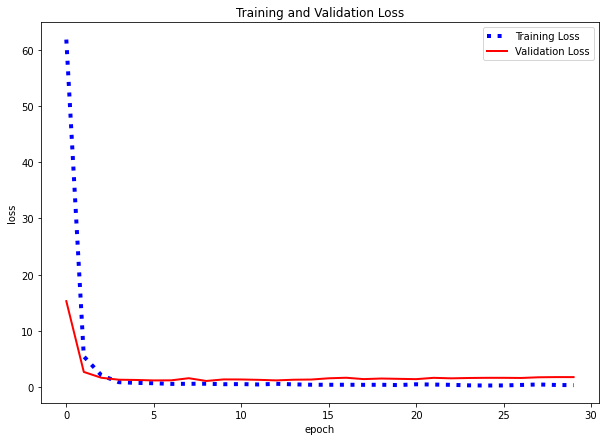

In [22]:
# Summarize history for loss
print("\n\nTraining and Validation Loss:")
print("=============================\n")
fig = plt.gcf()
fig.set_size_inches(10, 7)
plt.plot(history.history['loss'] ,linewidth = 4, color="b", linestyle=':')
plt.plot(history.history['val_loss'],linewidth = 2, color="r")
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()



Training and Validation Accuracy:



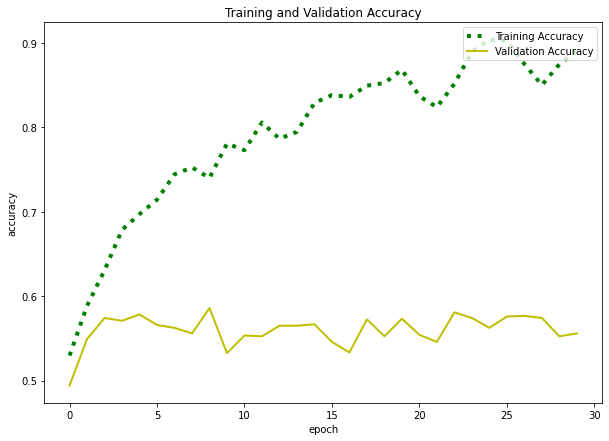

In [23]:
# Summarize history for accuracy
print("\n\nTraining and Validation Accuracy:")
print("================================\n")
fig = plt.gcf()
fig.set_size_inches(10, 7)
plt.plot(history.history['accuracy'] ,linewidth = 4, color="g", linestyle=':')
plt.plot(history.history['val_accuracy'],linewidth = 2, color="y")
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

## Step 6.4: Save the Trained Model

In [24]:
# Save the Trained Model

model.save('Trained_Model.h5')
print("\nTrained Model is Saved!!")
print("=========================\n")


Trained Model is Saved!!



# Step 7: Execute the Testing Phase 

## Step 7.1: Load Testing Data in Machine Understander Format (Numerical Representation) (Saved in Step 5.3.2)

In [25]:
testing_data = pd.read_excel(r'files/testing-features.xlsx')
for features in enumerate(testing_data["Pixel Values"]):
    testing_data["Pixel Values"][features[0]]=np.fromstring(features[1][1:-1], dtype=np.uint8, sep=',')
print("\n\nTesting Data:")
print("==============\n")
print(testing_data)



Testing Data:

                                          Pixel Values  Label
0    [53, 74, 106, 50, 71, 103, 46, 67, 98, 51, 73,...      0
1    [114, 151, 179, 227, 228, 235, 242, 242, 240, ...      0
2    [104, 125, 138, 109, 126, 138, 111, 132, 140, ...      0
3    [103, 105, 105, 107, 109, 109, 115, 117, 116, ...      0
4    [243, 245, 223, 244, 243, 221, 244, 245, 224, ...      0
..                                                 ...    ...
995  [78, 48, 91, 79, 56, 93, 78, 53, 87, 81, 56, 8...      1
996  [159, 151, 135, 161, 155, 146, 166, 157, 152, ...      1
997  [113, 116, 132, 118, 128, 140, 87, 95, 114, 97...      1
998  [184, 175, 179, 186, 175, 184, 185, 176, 184, ...      1
999  [109, 145, 114, 87, 137, 107, 119, 184, 157, 1...      1

[1000 rows x 2 columns]


## Step:7.2 Load the Model (Saved in Step 6.4)

In [26]:
# Load the Saved Model
model = load_model("Trained_Model.h5")

## Step 7.3: Evaluate the Machine Learning Model


### Step 7.3.1: Splitting Testing Data into Input Feature Vectors and Outputs / Labels

In [27]:
# Splitting Input Vectors and Outputs/Labels of Testing Data

print("\n\nInputs Vectors (Feature Vectors) of Testing Data:")
print("=================================================\n")
input_vector_test = testing_data.iloc[: , :-1]
print(input_vector_test)
input_test=np.zeros((len(input_vector_test["Pixel Values"]),6075),dtype=np.uint8)

for input_vector in enumerate(input_vector_test["Pixel Values"]):
    input_test[input_vector[0]]=input_vector[1]
print("\n\nOutputs/Labels of Testing Data:")
print("==============================\n")
print("    Label")
output_label_test = testing_data.iloc[: ,-1]
print(output_label_test)



Inputs Vectors (Feature Vectors) of Testing Data:

                                          Pixel Values
0    [53, 74, 106, 50, 71, 103, 46, 67, 98, 51, 73,...
1    [114, 151, 179, 227, 228, 235, 242, 242, 240, ...
2    [104, 125, 138, 109, 126, 138, 111, 132, 140, ...
3    [103, 105, 105, 107, 109, 109, 115, 117, 116, ...
4    [243, 245, 223, 244, 243, 221, 244, 245, 224, ...
..                                                 ...
995  [78, 48, 91, 79, 56, 93, 78, 53, 87, 81, 56, 8...
996  [159, 151, 135, 161, 155, 146, 166, 157, 152, ...
997  [113, 116, 132, 118, 128, 140, 87, 95, 114, 97...
998  [184, 175, 179, 186, 175, 184, 185, 176, 184, ...
999  [109, 145, 114, 87, 137, 107, 119, 184, 157, 1...

[1000 rows x 1 columns]


Outputs/Labels of Testing Data:

    Label
0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: Label, Length: 1000, dtype: int64


### Step 7.3.2: Evaluate the Model (Make Predictions on Test Data)

In [28]:
# Evaluate the Machine Learning Model
# Provide Test data to the Trained Model

input_test = np.array(input_test)
output_label_test = np.array(output_label_test)

input_test = input_test.reshape(input_test.shape[0], 45, 45, 3)

model_predictions = model.predict(input_test)
model_predictions2 = model_predictions.copy()
testing_data.copy(deep=True)
pd.options.mode.chained_assignment = None
a=0
list = []
for i in model_predictions:
    model_predictions[a] = np.argmax(i)
    list.append(model_predictions[a][0].astype("int32"))
    a=a+1
    
testing_data["Predictions"] = list

list = testing_data 
print("\n\nPredictions Returned by trained_model:")
print("======================================\n")
print(list)



Predictions Returned by trained_model:

                                          Pixel Values  Label  Predictions
0    [53, 74, 106, 50, 71, 103, 46, 67, 98, 51, 73,...      0            0
1    [114, 151, 179, 227, 228, 235, 242, 242, 240, ...      0            1
2    [104, 125, 138, 109, 126, 138, 111, 132, 140, ...      0            1
3    [103, 105, 105, 107, 109, 109, 115, 117, 116, ...      0            1
4    [243, 245, 223, 244, 243, 221, 244, 245, 224, ...      0            0
..                                                 ...    ...          ...
995  [78, 48, 91, 79, 56, 93, 78, 53, 87, 81, 56, 8...      1            0
996  [159, 151, 135, 161, 155, 146, 166, 157, 152, ...      1            1
997  [113, 116, 132, 118, 128, 140, 87, 95, 114, 97...      1            1
998  [184, 175, 179, 186, 175, 184, 185, 176, 184, ...      1            1
999  [109, 145, 114, 87, 137, 107, 119, 184, 157, 1...      1            0

[1000 rows x 3 columns]


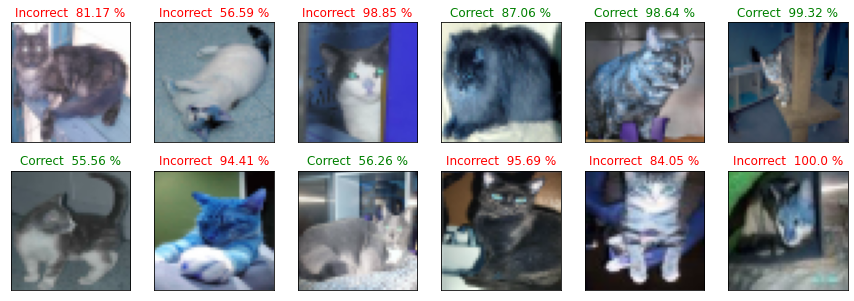

In [29]:
# Show test data images
w=10
h=10
fig=plt.figure(figsize=(15, 5))
columns = 6
rows = 2
for i in range(1, columns*rows +1):
    data = list["Pixel Values"][i]
    if(list["Label"][i]==list["Predictions"][i]):
        
        title = str("Correct  ")+str(round(model_predictions2[i][0]*100,2))+str(" %")
        img = data.reshape(45,45,3)
        fig.add_subplot(rows, columns, i)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title,color="green")
        plt.imshow(img)
        plt.xticks([]),  plt.yticks([])
    else:
        title = str("Incorrect  ")+str(round(model_predictions2[i][1]*100,2))+str(" %")
        img = data.reshape(45,45,3)
        fig.add_subplot(rows, columns, i)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title,color="red")
        plt.imshow(img)
        plt.xticks([]),  plt.yticks([])

### Step 7.3.3: Evaluate the Model (Calculate Accuracy Score)

In [30]:
# Calculate the Accuracy Score

from sklearn.metrics import accuracy_score
model_accuracy_score = accuracy_score(list["Label"],list["Predictions"])

print("\n\nAccuracy Score:")
print("===============")
print("    " , round(model_accuracy_score,2))
print("===============\n")



Accuracy Score:
     0.57



# Step 8: Execute the Application Phase

## Step 8.1: Take Input from User

In [31]:
# Take Input from User

application_window = tk.Tk()

# Build a list of tuples for each file type the file dialog should display

my_filetypes = [('all files', '.*'), ('text files', '.txt')]

# Ask the user to select a single file name
user_file = filedialog.askopenfilename(parent=application_window,
                                    initialdir=os.getcwd(),
                                    title="Please select an Image to detect gender:",
                                    filetypes=my_filetypes)
application_window.destroy()
user_input=cv2.imread(user_file)

## Step 8.2:  Convert User Input into Feature Vector using Pixel Values based Approach (Exactly Same as Feature Vectors of Training Data and Testing Data)

In [32]:
# Convert User Input into Feature Vector
user_input = cv2.resize(user_input,(45,45),interpolation=cv2.INTER_AREA)
user_input = user_input.flatten()
print("\n\nUser Input Feature Vector:")
print("==========================\n")
print(user_input)



User Input Feature Vector:

[186 189 194 ... 158 169 173]


## Step 8.3: Make Prediction on Unseen Data 

## Step 8.3.1: Load the Model (Saved in Step 6.4)

In [33]:
# Load the Saved Model
model = load_model("Trained_Model.h5")

## Step 8.3.2: Apply Model on Feature Vector of Unseen Data

In [34]:
# Prediction of Unseen Instance
# Make a Prediction on Unseen Data
user_input = np.array(user_input)
user_input = user_input.reshape(1, 45, 45, 3)
predicted_label = model.predict([user_input])

## Step 8.3.3: Return Prediction to the User 

In [35]:
predicted_label = np.argmax(predicted_label)
if(predicted_label == 0): 
    prediction = "Cat"
if(predicted_label == 1):
    prediction = "Dog"

# Add the Prediction in a Pretty Table

pretty_table = PrettyTable()
pretty_table.add_column("       ** Prediction **       ",[prediction])
print(pretty_table)

+--------------------------------+
|        ** Prediction **        |
+--------------------------------+
|              Cat               |
+--------------------------------+


I am aware of differences in codes used by me and used during classes. I used some help of my friend who does not attend our Python classes and I also used some external Internet sources.